# Exploration 18. 문자를 읽을 수 있는 딥러닝 

## STEP1. 검증용 데이터 셋 준비 


In [15]:
import matplotlib.pyplot as plt
import os
from glob import glob
import matplotlib.image as img
import numpy as np
import keras_ocr
import pytesseract
from PIL import Image
from pytesseract import Output

In [14]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=d287606719105bbb046a97291666c13e2ed9396cebc3a9857fab8b1aa4a4ae96
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [11]:
pip install keras_ocr

In [3]:
pip install --upgrade google-api-python-client

     |████████████████████████████████| 7.5 MB 5.2 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.282 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.22.0 which is incompatible.


In [4]:
pip install google-cloud-vision

     |████████████████████████████████| 369 kB 5.7 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 


In [26]:
img_dir = '/content/drive/MyDrive/aiffel/ocr_python/images/'
file_list = glob(path+'*.PNG')
file_list

['/content/drive/MyDrive/aiffel/ocr_python/images/1.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/2.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/3.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/4.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/5.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/6.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/7.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/8.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/9.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/10.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/11.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/12.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/13.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/14.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/15.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/16.PNG',
 '/content/drive/MyDrive/aiffel/ocr_python/images/17.PNG',
 '/con

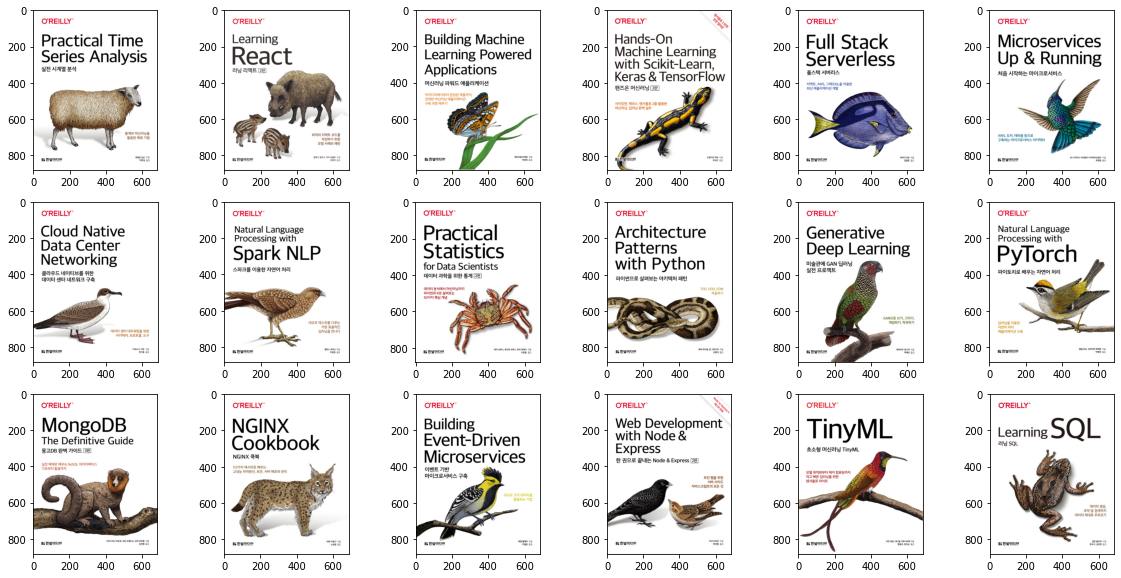

In [27]:
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    pil_img = img.imread(file_list[i])
    plt.imshow(pil_img)
plt.show()

## STEP2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### 2.1 Google OCR

In [28]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

1번째 이미지



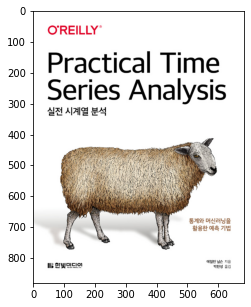

Texts:

"O'REILLY
Practical Time
Series Analysis
실전 시계열 분석
통계와 머신러닝을
활용한 예측 기법
에일린 닐슨 지음
HB 한빛미디의
박찬성 옮김
Harbit Medio, Ine
"

"O'REILLY"

"Practical"

"Time"

"Series"

"Analysis"

"실전"

"시계열"

"분석"

"통계"

"와"

"머신"

"러닝"

"을"

"활용"

"한"

"예측"

"기법"

"에일린"

"닐슨"

"지음"

"HB"

"한빛"

"미디"

"의"

"박찬성"

"옮김"

"Harbit"

"Medio,"

"Ine"
bounds: (148,828),(155,828),(155,831),(148,831)


In [29]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/drive/MyDrive/aiffel/ocr_python/my_google_api_key.json'

print(f'{1}번째 이미지\n')
plt.figure(figsize = (5, 5))
pil_img = img.imread(file_list[0])
plt.imshow(pil_img)
plt.show()
detect_text(file_list[0])

1번째 이미지



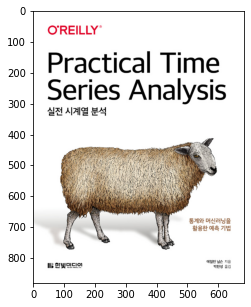

Texts:

"O'REILLY
Practical Time
Series Analysis
실전 시계열 분석
통계와 머신러닝을
활용한 예측 기법
에일린 닐슨 지음
HB 한빛미디의
박찬성 옮김
Harbit Medio, Ine
"

"O'REILLY"

"Practical"

"Time"

"Series"

"Analysis"

"실전"

"시계열"

"분석"

"통계"

"와"

"머신"

"러닝"

"을"

"활용"

"한"

"예측"

"기법"

"에일린"

"닐슨"

"지음"

"HB"

"한빛"

"미디"

"의"

"박찬성"

"옮김"

"Harbit"

"Medio,"

"Ine"
bounds: (148,828),(155,828),(155,831),(148,831)
2번째 이미지



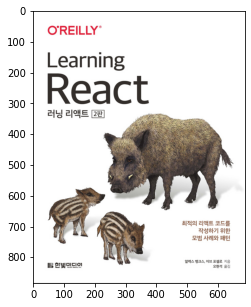

Texts:

"O'REILLY
Learning
React
러닝 리액트 [2)]
최적의 리액트 코드를
작성하기 위한
모범 사례와 패턴
1B 한빛민딘의
알렉스 뱅크스, 이브 포셀로 지음
오현석 옮김
Her Media, In
"

"O'REILLY"

"Learning"

"React"

"러닝"

"리"

"액트"

"["

"2"

")"

"]"

"최적"

"의"

"리"

"액트"

"코드"

"를"

"작성"

"하기"

"위한"

"모범"

"사례"

"와"

"패턴"

"1B"

"한빛"

"민딘"

"의"

"알렉스"

"뱅크스"

","

"이브"

"포셀"

"로"

"지음"

"오현석"

"옮김"

"Her"

"Media,"

"In"
bounds: (148,828),(157,828),(157,833),(148,833)
3번째 이미지



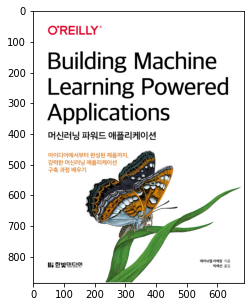

Texts:

"O'REILLY
Building Machine
Learning Powered
Applications
머신러닝 파워드 애플리케이션
아이디어에서부터 완성된 제품까지,
강력한 머신러닝 애플리케이션
구축 과정 배우기
HB 한빛민디의
에마뉘엘 아메장 지음
박해선 옮김
Hare Media, inc.
"

"O'REILLY"

"Building"

"Machine"

"Learning"

"Powered"

"Applications"

"머신"

"러닝"

"파워드"

"애플리케이션"

"아이디어"

"에서부터"

"완성"

"된"

"제품"

"까지"

","

"강력한"

"머신"

"러닝"

"애플리케이션"

"구축"

"과정"

"배우기"

"HB"

"한빛"

"민디"

"의"

"에마뉘엘"

"아메"

"장"

"지음"

"박해선"

"옮김"

"Hare"

"Media,"

"inc."
bounds: (149,830),(157,830),(157,833),(149,833)
4번째 이미지



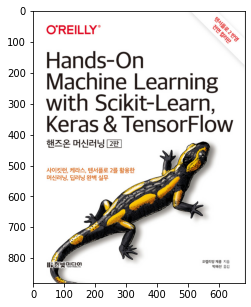

Texts:

"텐서플로 2 반영
O'REILLY
Hands-On
Machine Learning
with Scikit-Learn,
Keras & TensorFlow
핸즈온 머신러닝 2판]
사이킷런, 케라스, 텐서플로 2를 활용한
머신러닝, 딥러닝 완벽 실무
오렐리앙 제롱 지음
박해선 옮김
1B한빛민디이
Hanbit Media, ine
전면 컬러판
"

"텐서"

"플로"

"2"

"반영"

"O'REILLY"

"Hands-On"

"Machine"

"Learning"

"with"

"Scikit-Learn,"

"Keras"

"&"

"TensorFlow"

"핸즈"

"온"

"머신"

"러닝"

"2"

"판"

"]"

"사이"

"킷런"

","

"케"

"라스"

","

"텐서"

"플로"

"2"

"를"

"활용"

"한"

"머신"

"러닝"

","

"딥"

"러닝"

"완벽"

"실무"

"오렐리"

"앙"

"제롱"

"지음"

"박해선"

"옮김"

"1B"

"한빛"

"민"

"디이"

"Hanbit"

"Media,"

"ine"

"전면"

"컬러판"
bounds: (613,65),(643,95),(631,106),(602,76)
5번째 이미지



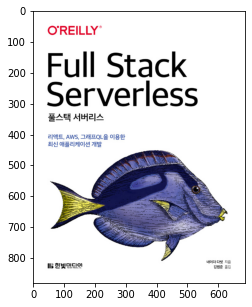

Texts:

"O'REILLY
Full Stack
Serverless
풀스택 서버리스
리액트, AWS, 그래프QL을 이용한
최신 애플리케이션 개발
IB 한빛미디의
네이더 다빗 지음
김범준 옮김
Har Medo, ne
"

"O'REILLY"

"Full"

"Stack"

"Serverless"

"풀"

"스택"

"서버"

"리스"

"리"

"액트"

","

"AWS"

","

"그래프"

"QL"

"을"

"이용한"

"최신"

"애플리케이션"

"개발"

"IB"

"한빛"

"미디"

"의"

"네이더"

"다빗"

"지음"

"김범준"

"옮김"

"Har"

"Medo,"

"ne"
bounds: (148,830),(155,830),(155,833),(148,833)
6번째 이미지



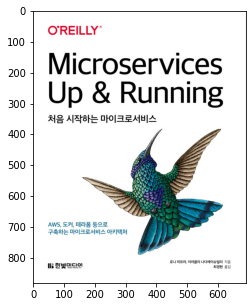

Texts:

"O'REILLY
Microservices
Up & Running
처음 시작하는 마이크로서비스
AWS, 도커, 테라폼 등으로
구축하는 마이크로서비스 아키텍처
1B 한빛민딘의
로니 미트라, 이라클리 나다레이슈빌리 지음
최경현 옮김
Hanoit Meda, ne
"

"O'REILLY"

"Microservices"

"Up"

"&"

"Running"

"처음"

"시작"

"하는"

"마이크로"

"서비스"

"AWS"

","

"도커"

","

"테라"

"폼"

"등"

"으로"

"구축"

"하는"

"마이크로"

"서비스"

"아키텍처"

"1B"

"한빛"

"민딘"

"의"

"로니"

"미트라"

","

"이라"

"클리"

"나"

"다레"

"이슈"

"빌리"

"지음"

"최경현"

"옮김"

"Hanoit"

"Meda,"

"ne"
bounds: (149,829),(155,829),(155,834),(149,834)
7번째 이미지



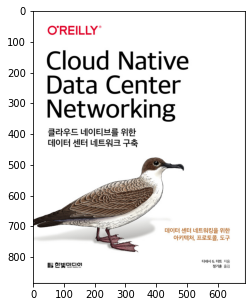

Texts:

"O'REILLY
Cloud Native
Data Center
Networking
클라우드 네이티브를 위한
데이터 센터 네트워크 구축
데이터 센터 네트워킹을 위한
아키텍처, 프로토콜, 도구
디네시 G. 더트 지음
정기훈 옮김
Hanoit Media, Ine.
"

"O'REILLY"

"Cloud"

"Native"

"Data"

"Center"

"Networking"

"클라우드"

"네이티브"

"를"

"위한"

"데이터"

"센터"

"네트워크"

"구축"

"데이터"

"센터"

"네트워킹"

"을"

"위한"

"아키텍처"

","

"프로토콜"

","

"도구"

"디"

"네시"

"G."

"더트"

"지음"

"정기훈"

"옮김"

"Hanoit"

"Media,"

"Ine."
bounds: (147,828),(158,828),(158,833),(147,833)
8번째 이미지



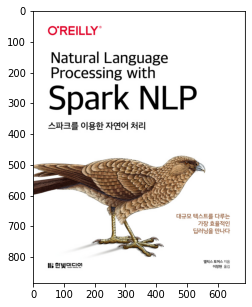

Texts:

"O'REILLY
Natural Language
Processing with
Spark NLP
스파크를 이용한 자연어 처리
대규모 텍스트를 다루는
가장 효율적인
딥러닝을 만나다
1B 한빛민딘의
앨릭스 토머스 지음
이창현 옮김
Hanoit Media, Inc.
"

"O'REILLY"

"Natural"

"Language"

"Processing"

"with"

"Spark"

"NLP"

"스파크"

"를"

"이용한"

"자연어"

"처리"

"대규모"

"텍스트"

"를"

"다루는"

"가장"

"효율적인"

"딥"

"러닝"

"을"

"만나다"

"1B"

"한빛"

"민딘"

"의"

"앨릭스"

"토머스"

"지음"

"이창현"

"옮김"

"Hanoit"

"Media,"

"Inc."
bounds: (148,829),(159,829),(159,834),(148,834)
9번째 이미지



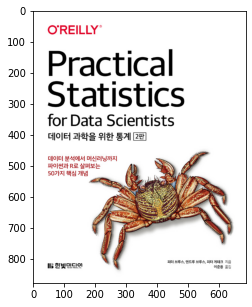

Texts:

"O'REILLY
Practical
Statistics
for Data Scientists
데이터 과학을 위한 통계 [2판]
데이터 분석에서 머신러 닝까지
파이썬과 R로 살펴보는
50가지 핵심 개념
1B 한빛미디이
피터 브루스, 앤드루 브루스, 피터 게데크 지음
이준용 옮김
"

"O'REILLY"

"Practical"

"Statistics"

"for"

"Data"

"Scientists"

"데이터"

"과학"

"을"

"위한"

"통계"

"["

"2"

"판"

"]"

"데이터"

"분석"

"에서"

"머신"

"러"

"닝"

"까지"

"파이썬"

"과"

"R"

"로"

"살펴"

"보는"

"50"

"가지"

"핵심"

"개념"

"1B"

"한빛"

"미디이"

"피터"

"브루스"

","

"앤드루"

"브루스"

","

"피터"

"게"

"데크"

"지음"

"이준용"

"옮김"
bounds: (620,821),(637,821),(637,832),(620,832)
10번째 이미지



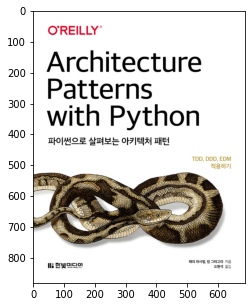

Texts:

"O'REILLY
Architecture
Patterns
with Python
파이썬으로 살펴보는 아키텍처 패턴
TDD, DDD, EDM
적용하기
1B 한빛민디이
해리 퍼시벌, 밥 그레고리 지음
오현석 옮김
Har Medo, ne
"

"O'REILLY"

"Architecture"

"Patterns"

"with"

"Python"

"파이썬"

"으로"

"살펴"

"보는"

"아키텍처"

"패턴"

"TDD,"

"DDD,"

"EDM"

"적용"

"하기"

"1B"

"한빛"

"민"

"디이"

"해리"

"퍼시벌"

","

"밥"

"그레고리"

"지음"

"오현석"

"옮김"

"Har"

"Medo,"

"ne"
bounds: (149,830),(155,830),(155,833),(149,833)
11번째 이미지



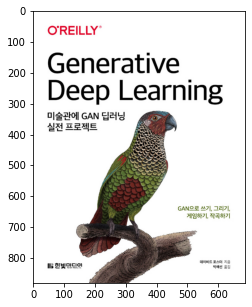

Texts:

"O'REILLY
Generative
Deep Learning
미술관에 GAN 딥러닝
실전 프로젝트
GAN으로 쓰기, 그리기,
게임하기, 작곡하기
IB 한빛미디의
데이비드포스터 지음
박해선 옮김
Har Medo, ine
"

"O'REILLY"

"Generative"

"Deep"

"Learning"

"미술관"

"에"

"GAN"

"딥"

"러닝"

"실전"

"프로젝트"

"GAN"

"으로"

"쓰기"

","

"그리기"

","

"게임"

"하기"

","

"작곡"

"하기"

"IB"

"한빛"

"미디"

"의"

"데이비드"

"포스터"

"지음"

"박해선"

"옮김"

"Har"

"Medo,"

"ine"
bounds: (148,830),(154,830),(154,833),(148,833)
12번째 이미지



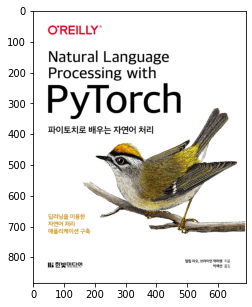

Texts:

"O'REILLY
Natural Language
Processing with
РУTorch
파이토치로 배우는 자연어 처리
딥러닝을 이용한
자연어 처리
애플리케이션 구축
B 힌빛민디이
델립 라오, 브라이언 맥머핸 지음
박해선 옮김
Harbet Medo, ne
"

"O'REILLY"

"Natural"

"Language"

"Processing"

"with"

"РУTorch"

"파이"

"토치로"

"배우는"

"자연어"

"처리"

"딥"

"러닝"

"을"

"이용한"

"자연어"

"처리"

"애플리케이션"

"구축"

"B"

"힌"

"빛민"

"디이"

"델립"

"라오"

","

"브라이언"

"맥"

"머핸"

"지음"

"박해선"

"옮김"

"Harbet"

"Medo,"

"ne"
bounds: (149,828),(156,828),(156,832),(149,832)
13번째 이미지



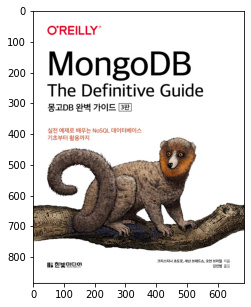

Texts:

"O'REILLY
MongoDB
The Definitive Guide
몽고DB 완벽 가이드 3판]
실전 예제로 배우는 NOSQL 데이터베이스
기초부터 활용까지
I13 한빛민딘이1
크리스티나 초도로, 섀넌 브래드쇼, 오언브라질 지음
김인범 옮김
Hart Medo, ne
"

"O'REILLY"

"MongoDB"

"The"

"Definitive"

"Guide"

"몽고"

"DB"

"완벽"

"가이드"

"3"

"판"

"]"

"실전"

"예제"

"로"

"배우는"

"NOSQL"

"데이터베이스"

"기초"

"부터"

"활용"

"까지"

"I13"

"한빛"

"민딘"

"이"

"1"

"크리스티나"

"초도"

"로"

","

"섀넌"

"브래드쇼"

","

"오언"

"브라질"

"지음"

"김인범"

"옮김"

"Hart"

"Medo,"

"ne"
bounds: (146,827),(157,827),(157,832),(146,832)
14번째 이미지



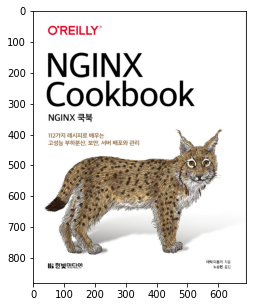

Texts:

"O'REILLY
NGINX
Cookbook
NGINX 쿡북
112가지 레시피로 배우는
고성능 부하분산, 보안, 서버 배포와 관리
1B 한빛민딘이
데릭 디용기 지음
노승현 옮김
Harbt Medo, ne
"

"O'REILLY"

"NGINX"

"Cookbook"

"NGINX"

"쿡북"

"112"

"가지"

"레시피"

"로"

"배우는"

"고성능"

"부하"

"분산"

","

"보안"

","

"서버"

"배포"

"와"

"관리"

"1B"

"한빛"

"민딘"

"이"

"데릭"

"디"

"용기"

"지음"

"노승현"

"옮김"

"Harbt"

"Medo,"

"ne"
bounds: (149,829),(155,829),(155,833),(149,833)
15번째 이미지



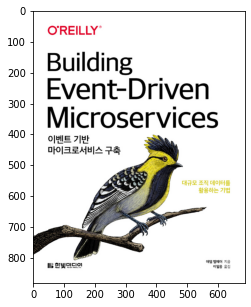

Texts:

"O'REILLY
Building
Event-Driven
Microservices
이벤트 기반
마이크로서비스 구축
대규모 조직 데이터를
활용하는 기법
I1B 한빛민디이
애덤 벨메어 지음
이일웅 옮김
Har Medo, ne
"

"O'REILLY"

"Building"

"Event-Driven"

"Microservices"

"이벤트"

"기반"

"마이크로"

"서비스"

"구축"

"대규모"

"조직"

"데이터"

"를"

"활용"

"하는"

"기법"

"I1B"

"한빛"

"민"

"디이"

"애덤"

"벨"

"메어"

"지음"

"이일웅"

"옮김"

"Har"

"Medo,"

"ne"
bounds: (148,829),(156,829),(156,833),(148,833)
16번째 이미지



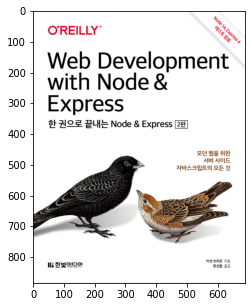

Texts:

"테스트 완료
O'REILLY
Web Development
with Node &
Express
한 권으로 끝내는 Node & Express [2판]
모던 웹을 위한
서버 사이드
자바스크립트의 모든 것
이선 브라운 지음
한선용 옮김
1B 한빛민디이
Har Medo, ine
Node 14, Express 4
"

"테스트"

"완료"

"O'REILLY"

"Web"

"Development"

"with"

"Node"

"&"

"Express"

"한"

"권"

"으로"

"끝내는"

"Node"

"&"

"Express"

"["

"2"

"판"

"]"

"모던"

"웹"

"을"

"위한"

"서버"

"사이드"

"자바"

"스크립트"

"의"

"모든"

"것"

"이선"

"브라운"

"지음"

"한선"

"용"

"옮김"

"1B"

"한빛"

"민"

"디이"

"Har"

"Medo,"

"ine"

"Node"

"14,"

"Express"

"4"
bounds: (669,93),(674,98),(667,105),(662,100)
17번째 이미지



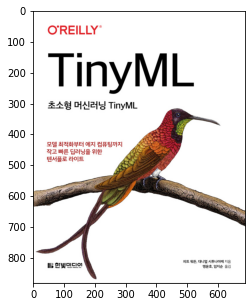

Texts:

"O'REILLY
TinyML
초소형 머신러닝 TinyML
모델 최적화부터 에지 컴퓨팅까지
작고 빠른 딥러닝을 위한
텐서플로 라이트
1B 한빛미디의
피트 워든, 대니얼 시투나야케 지음
맹윤호, 임지순 옮김
Hareit Meda, inc.
"

"O'REILLY"

"TinyML"

"초소형"

"머신"

"러닝"

"TinyML"

"모델"

"최적화"

"부터"

"에지"

"컴퓨팅"

"까지"

"작고"

"빠른"

"딥"

"러닝"

"을"

"위한"

"텐서"

"플로"

"라이트"

"1B"

"한빛"

"미디"

"의"

"피트"

"워든"

","

"대니얼"

"시투"

"나야"

"케"

"지음"

"맹윤호"

","

"임지순"

"옮김"

"Hareit"

"Meda,"

"inc."
bounds: (148,829),(156,829),(156,833),(148,833)
18번째 이미지



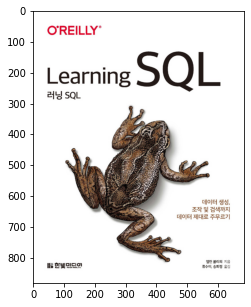

Texts:

"O'REILLY
Learning SQL
러닝 SQL
데이터 생성,
조작 및 검색까지
데이터 제대로 주무르기
HB 한빛민딘잇
앨런 볼리외 지음
류수미, 송희정 옮김
Har Mea, ne
"

"O'REILLY"

"Learning"

"SQL"

"러닝"

"SQL"

"데이터"

"생성"

","

"조작"

"및"

"검색"

"까지"

"데이터"

"제대로"

"주무르기"

"HB"

"한빛"

"민"

"딘잇"

"앨런"

"볼리"

"외"

"지음"

"류수미"

","

"송희정"

"옮김"

"Har"

"Mea,"

"ne"
bounds: (147,828),(156,828),(156,833),(147,833)


In [30]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/drive/MyDrive/aiffel/ocr_python/my_google_api_key.json'

for i in range(18):
    print(f'{i+1}번째 이미지\n')
    plt.figure(figsize = (5, 5))
    pil_img = img.imread(file_list[i])
    plt.imshow(pil_img)
    plt.show()
    detect_text(file_list[i])

## 2.2 keras-ocr

In [31]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [32]:
images = [ keras_ocr.tools.read(path) for path in file_list]
prediction_groups = [pipeline.recognize([path]) for path in file_list]

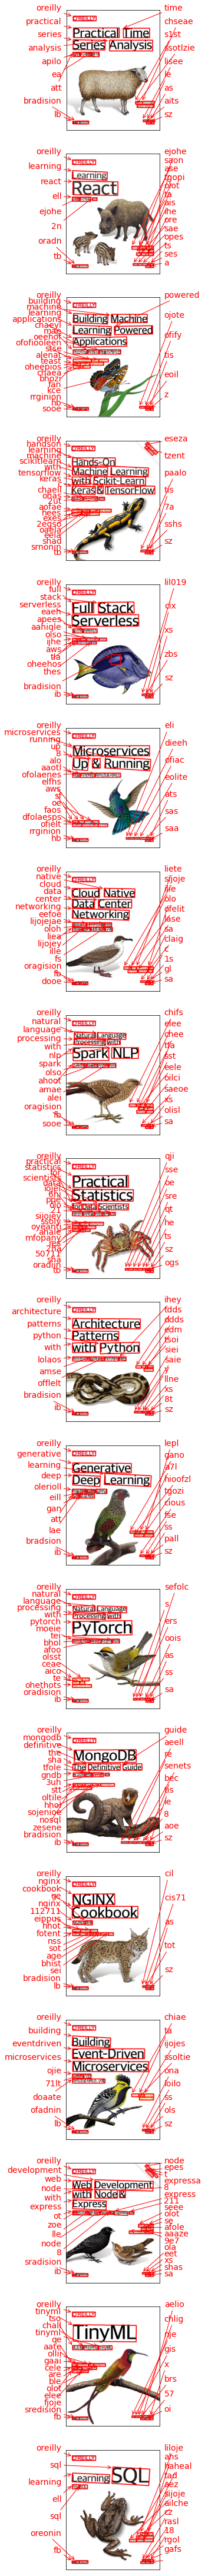

In [18]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 2.3 Tesseract

In [19]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,722 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [39]:

# 3) 테서랙트로 문자 검출하고 이미지 자르기 (detection)
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import cv2
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def tesseract_detect(file_list):
    img = cv2.imread(file_list)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(file_list)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
   
    top_level = max(recognized_data['level'])

    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            print(recognized_data['text'][i])

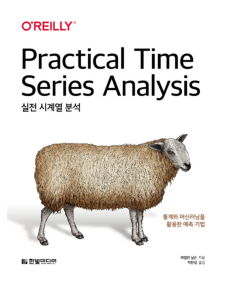

O'REILLY’
Practical
Time
Series
Analysis
Ala
Aja
al
   
Salo}
Olas
eget
ols
7
olga!
we
Xi
Ws
BrUSIEION
meee
ae


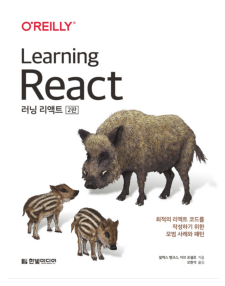

O'REILLY’
Learning
React
41
BOWE
[per
 
 
 
 
 
a{X9|
2G
AES
Aysot7|
Fst
BS
Ateiot
met
UMA
MAA
os
Ze
x1g
oe
Bz


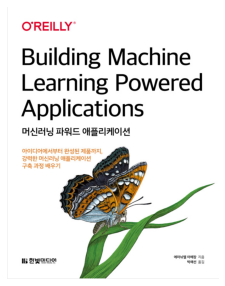

O'REILLY
Building
Machine
Learning
Powered
Applications
HALA!
DESI
of
Sz
AI0]-4
   
  
 
OfO|CIOfO
AT
AE]
SHAY!
AZM,
ZRSE
HAL2|el
OfBEIAJO]d
PR
PY
WHO
|}
OF
ne
Us
BIEUEION
mane


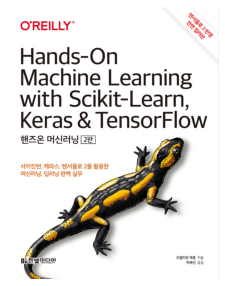

&%
O'REILLY’
Hands-On
Machine
Learning
with
Scikit-Learn,
Keras
&
TensorFlow
SHAS
HAL
[oer
%
Re,
sat
 
 
 
 
 
   
 
ALOIZ,
eee
aMe=
23
2get
Haleld,
Bald
ete
ae


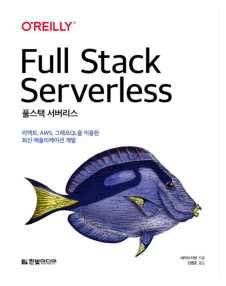

O'REILLY’
Full
Stack
Serverless
BAGH
HPIA
BIKE,
AWS,
TeHZQLS
0|Bst
ajal
og
BIAIOL
AA
THEE
 
Hs
Sryaicion


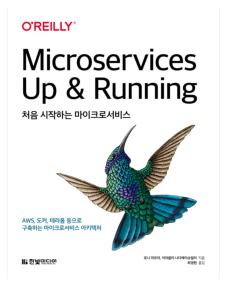

O'REILLY
Microservices
Up
&
Running
AS
AlatopeE
OfFO|aRAHI|A
   
AWS,
£1,
elles
SL
PRS
00/2
MwA
Of
|e}
BU
OS,
of
el
Ucietors
ue!
xe,
is
Sraicion
aad
2


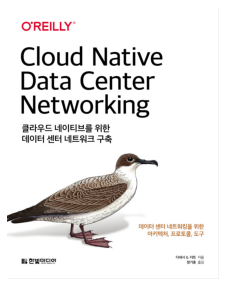

O'REILLY®
Cloud
Native
Data
Center
Networking
Z7S&
YOle|Hs
Ist
HOLE}
MIE]
YE
SI
PS
   
GJO|EY
IE
HE
SIZIg
eIst
OIA,
BEES,
Sp
CIMA
G.
HE
xg
is
Sraicion
wit
22


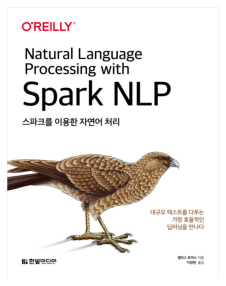

O'REILLY’
Natural
Language
Processing
with
Spark
NLP
ATLAS
0/88
110]
HA]
=
on
  
 
AS
YASS
CRE
  
GAA
ENA
a5
is
StsaICION
oa
aa


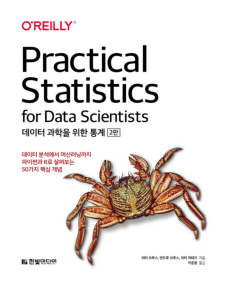

O'REILLY’
Practical
Statistics
for
Data
Scientists
PHOIE{
HEEL
O}St
S74]
BEE
4
 
 
 
 
CHJOIEY
AYOH
AY
CHALE
S77
DOP}
Ree
Af
At
SO7HAI
Sed
7H
   
Be]
BRA
GER
BRA
DIE
AIA
X1S
Is
SraIcion
ogg
22


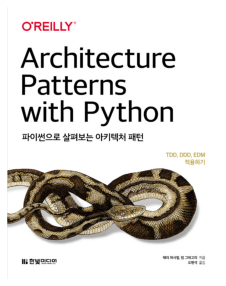

O'REILLY’
Architecture
Patterns
with
Python
THO)
MOm
Aye
OfF
[Ells]
WHE
TDD,
DDD,
EDM
AZep|
 
ome]
ANY,
Yt
eNmey
ig
204
32
Hs
Sryaicion


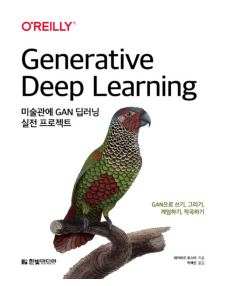

O'REILLY’
Generative
Deep
Learning
O|8#t0l]
GAN
G2]'e
AIM
ZEAE
   
  
   
GANSS
47,
327],
Alas,
ASst71
Hs
Sryaicion


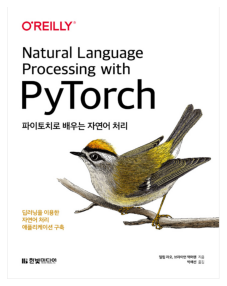

O'REILLY’
Natural
Language
Processing
with
PyTorch
DPO|ER|S
HPS
AAO
A
2]
  
   
Beads
get
e
KHAO
Hz]
»
al
BAA
RS
E212,
setoje!
OKeH
21g
wand
221
Hs
Sryaicion


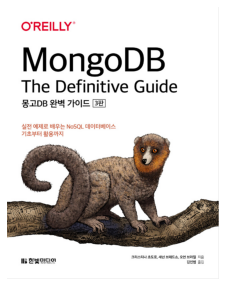

MongoDB
The
Definitive
Guide
SDB
Stet
JOS
 
ARIAL
AER
MM
MITA,
O91
Met
Aig
weld
a2
Hs
Sryaicion


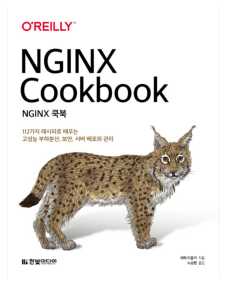

O'REILLY’
NGINX
Cookbook
NGINX
35
 
   
127k
ALIS
HHS
TAS
MOEA,
MOF,
AH
HzO}
Be]
IB
SryaICION
eae


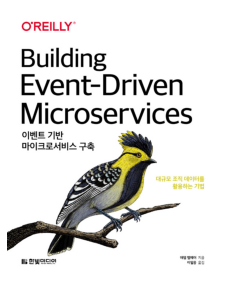

O'REILLY’
Building
_
Event-Driven
Microservices
O|WIE
7|¥t
DOaeMH|A
PE
   
 
 
Chat
2A}
GO|
BScte
74


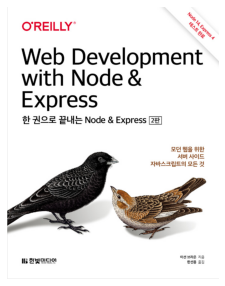

O'REILLY’
Sa
&
Web
Development
with
Node
&
Express
st
HO
BLY
Node
&
Express
[2#
 
 
 
 
SA
Ws
cet
AH
ALOIS
XPAS
BES]
BE
2
   
Hs
Sryaicion


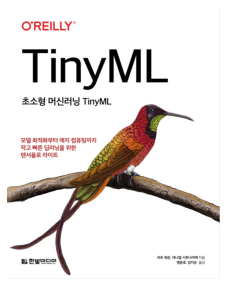

O'REILLY
TinyML
AAS
HAE
TinyML
 
  
   
  
 
So
SI5fS}He}
On|
ARSIIAI
ALD
MS
Clee
ost
aI
21015
IS
SE,
CHLIGL
ABLIOW
A
XS
Bes,
we
Ba


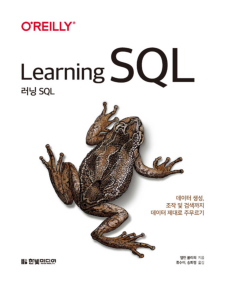

O'REILLY’
Learning
SOL
2'd
SQL
     
 
BOLE
AS,
Bag!
Ba
GIOJEY
AICHE
FEI]
‘wet
Hele)
xig
ROL,
S818
Sz
o
o
Ms
Sry
i
i


In [40]:
for file in file_list:
    tesseract_detect(os.path.join(path, file))

## STEP4. 결과 분석과 결론 제시



* Google OCR API

  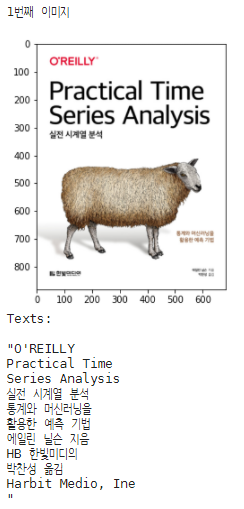

* keras-ocr

  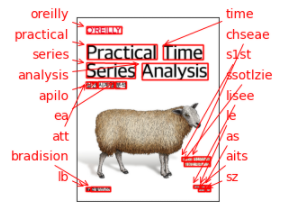

* Tesseract

  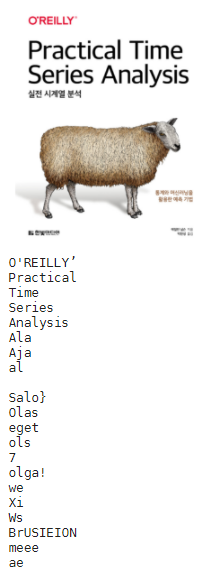

# 회고 

한글과 영어가 같이 있는 책표지를 사용해서 Google OCR API, keras-ocr, Tesseract로 글자인식을 했다. 

가장 잘 인식 한것은 Google OCR API이지만 

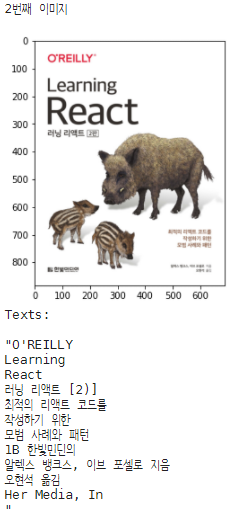

위의 사진처럼 네모안에 들어있는 `2판`은 인식을 하는 경우도 있고 못하는 경우도 있었다. 

하지만 나머지 두 방식은 한글을 잘 인식하지 못했고 Tesseract는 "kor+eng"를 적용해도 한글을 잘 인식하지 못했다. 

그렇기 때문에, 한+영을 인식하는 가장 좋은 방식은 Google OCR API인 것을 알 수 있었다. 

이번 노드를 통해 사진에 있는 글씨를 인식하는 방법을 알 수 있었고, 실제 사진을 사용해 직접 인식해봐서 좋은 기회라고 생각한다. 